In [1]:
from sklearn.neighbors import KNeighborsClassifier

from utils_data import *
from utils_evaluation import evaluate_numpy
from utils_plot import plot_confusion_matrix, plot_roc

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = PopulationData().load_raw('data/raw/train.csv')
data.encode_normalized_age()
data.encode_normalized_constitution()
data.encode_normalized_behavior()
data.encode_standardized_age()
data.encode_standardized_constitution()
data.encode_standardized_behavior()
data.encode_connection_lists()
data.encode_graph_nx()
data.encode_degree()
data.encode_degree_centrality()
data.encode_clustering_coefficient()
data.encode_normalized_degree()
data.encode_normalized_degree_centrality()
data.encode_normalized_clustering_coefficient()
data.encode_standardized_degree()
data.encode_standardized_degree_centrality()
data.encode_standardized_clustering_coefficient()
data.encode_connected_index_patient()
data.encode_distance_to_index_patient()
data.encode_normalized_distance_to_index_patient()
data.encode_standardized_distance_to_index_patient()
data.encode_sum_neighbor_age()
data.encode_sum_neighbor_constitution()
data.encode_sum_neighbor_behavior()
data.encode_sum_neighbor_degree()
data.encode_sum_neighbor_degree_centrality()
data.encode_sum_neighbor_clustering_coefficient()
data.encode_normalized_sum_neighbor_age()
data.encode_normalized_sum_neighbor_constitution()
data.encode_normalized_sum_neighbor_behavior()
data.encode_normalized_sum_neighbor_degree()
data.encode_normalized_sum_neighbor_degree_centrality()
data.encode_normalized_sum_neighbor_clustering_coefficient()
data.encode_standardized_sum_neighbor_age()
data.encode_standardized_sum_neighbor_constitution()
data.encode_standardized_sum_neighbor_behavior()
data.encode_standardized_sum_neighbor_degree()
data.encode_standardized_sum_neighbor_degree_centrality()
data.encode_standardized_sum_neighbor_clustering_coefficient()
data.encode_mean_neighbor_age()
data.encode_mean_neighbor_constitution()
data.encode_mean_neighbor_behavior()
data.encode_mean_neighbor_degree()
data.encode_mean_neighbor_degree_centrality()
data.encode_mean_neighbor_clustering_coefficient()
data.encode_normalized_mean_neighbor_age()
data.encode_normalized_mean_neighbor_constitution()
data.encode_normalized_mean_neighbor_behavior()
data.encode_normalized_mean_neighbor_degree()
data.encode_normalized_mean_neighbor_degree_centrality()
data.encode_normalized_mean_neighbor_clustering_coefficient()
data.encode_standardized_mean_neighbor_age()
data.encode_standardized_mean_neighbor_constitution()
data.encode_standardized_mean_neighbor_behavior()
data.encode_standardized_mean_neighbor_degree()
data.encode_standardized_mean_neighbor_degree_centrality()
data.encode_standardized_mean_neighbor_clustering_coefficient()
data.encode_test_train()

In [3]:
features = ['Normalized_Age',
			'Normalized_Behaviour',
			'Normalized_Constitution',
			'Normalized_Degree',
			'Normalized_Distance_to_Index_Patient',
			'Normalized_Sum_Neighbor_Age',
			'Normalized_Sum_Neighbor_Behaviour',
			'Normalized_Sum_Neighbor_Constitution',
			'Normalized_Sum_Neighbor_Degree']
train_features, train_labels = data.get_data_numpy(features=features, train='Train')
test_features, test_labels = data.get_data_numpy(features=features, train='Test')

In [4]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_features, train_labels)

KNeighborsClassifier()

In [5]:
test_predicted = model.predict(test_features)
test_probabilities = model.predict_proba(test_features)
test_probabilities = test_probabilities[:, 1]
accuracy, precision, recall, f1, auc_roc, confusion_matrix = evaluate_numpy(test_predicted, test_probabilities, test_labels)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

Accuracy: 0.5401
Precision: 0.5086
Recall: 0.4792
F1: 0.4935
AUC-ROC: 0.5474


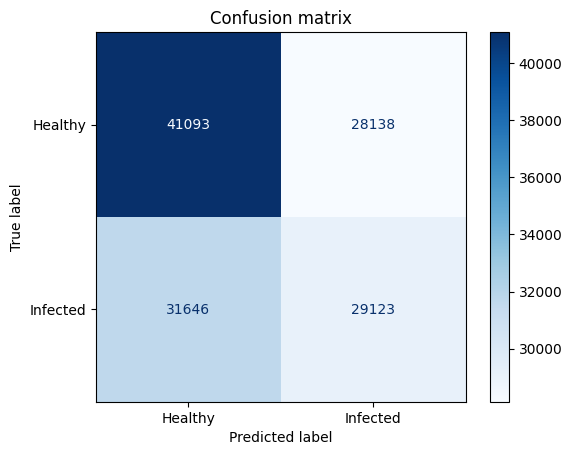

In [6]:
plot_confusion_matrix(confusion_matrix, ['Healthy', 'Infected'])

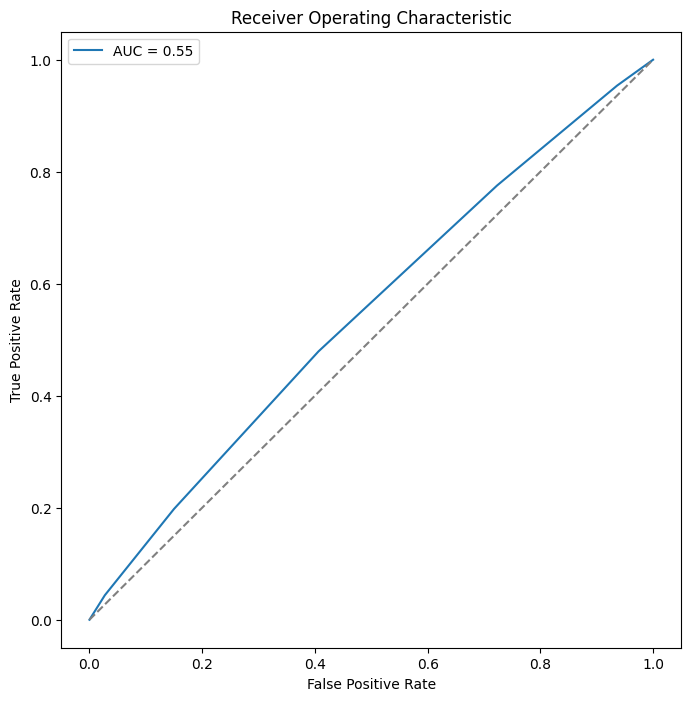

In [7]:
plot_roc(test_probabilities, test_labels)